In [ ]:
import pandas as pd

In [3]:
data = pd.read_csv('/content/online_retail_II.csv')
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print('No. of missing values: {}. \n'.format(missing_values))

# Handle missing values (example: removing rows with missing values)
data = data.dropna()

# Convert InvoiceDate to datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

data.head()

No. of missing values: Invoice             0
StockCode           0
Description      4332
Quantity            1
InvoiceDate         1
Price               1
Customer ID    225567
Country             1
dtype: int64. 



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
from datetime import datetime

# Calculate recency, frequency, and monetary values
today = datetime(2023, 8, 20)  # Update with the current date
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
rfm_data = data.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (today - x.max()).days,
    'Invoice': 'nunique',
    'Price': 'sum'
}).reset_index()

# Rename columns
rfm_data.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']
rfm_data.head()

,Customer ID,Recency,Frequency,Monetary
0,12346.0,4596,17,580.44
1,12347.0,4310,7,630.62
2,12348.0,4346,5,193.10
3,12349.0,4678,4,899.49
4,12350.0,4581,1,65.30


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data[['Recency', 'Frequency', 'Monetary']])
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])
rfm_scaled_df.head()

,Recency,Frequency,Monetary
0,0.494545,0.631858,0.046049
1,-0.902004,-0.019094,0.073269
2,-0.726214,-0.149284,-0.164065
3,0.894953,-0.214379,0.219119
4,0.421299,-0.409665,-0.233391


In [7]:
import warnings

# Disable all warnings
warnings.filterwarnings("ignore")

# # Re-enable warnings
# warnings.resetwarnings()

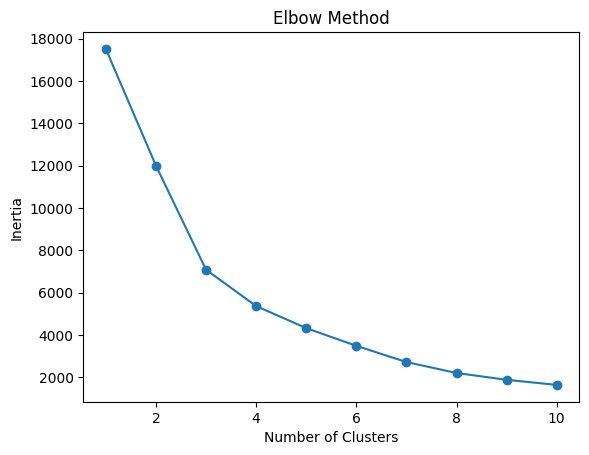

,Customer ID,Recency,Frequency,Monetary,Cluster
0,12346.0,4596,17,580.44,0
1,12347.0,4310,7,630.62,1
2,12348.0,4346,5,193.10,1
3,12349.0,4678,4,899.49,0
4,12350.0,4581,1,65.30,0


In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Find optimal number of clusters using the Elbow Method
inertia_values = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method
import matplotlib.pyplot as plt

plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Choose the optimal number of clusters (e.g., from the elbow point or Silhouette Score)
n_clusters = 3

# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
rfm_data['Cluster'] = kmeans.fit_predict(rfm_scaled)
rfm_data.head()

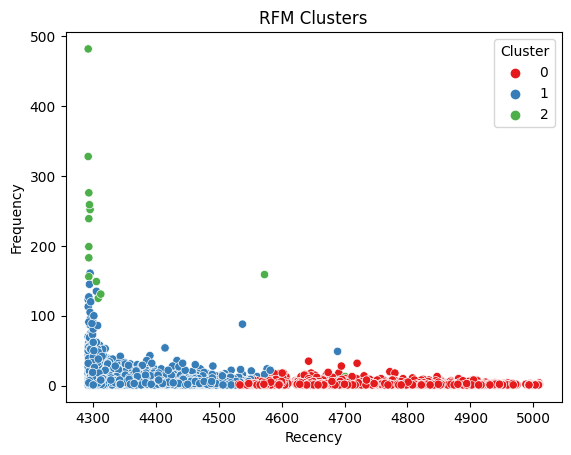

In [10]:
import seaborn as sns

# Visualize the clusters
sns.scatterplot(data=rfm_data, x='Recency', y='Frequency', hue='Cluster', palette='Set1')
plt.title('RFM Clusters')
plt.show()